In [1]:
import os
import sys
import random
import time
from random import seed, randint
import argparse
import platform
from datetime import datetime
import imp
import numpy as np
import fileinput
from itertools import product
import pandas as pd
from scipy.interpolate import griddata
from scipy.interpolate import interp2d
import seaborn as sns
from os import listdir

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import griddata
import matplotlib as mpl
# sys.path.insert(0,'..')
# from notebookFunctions import *
# from .. import notebookFunctions
from Bio.PDB.Polypeptide import one_to_three
from Bio.PDB.Polypeptide import three_to_one
from Bio.PDB.PDBParser import PDBParser
from pyCodeLib import *
# from small_script.myFunctions import *
sys.path.insert(0, "/Users/weilu/openmmawsem")
from helperFunctions.myFunctions import *
from collections import defaultdict
%matplotlib inline
# plt.rcParams['figure.figsize'] = (10,6.180)    #golden ratio
# %matplotlib notebook
%load_ext autoreload
%autoreload 2

In [2]:
plt.rcParams['figure.figsize'] = np.array([16.18033, 10])    #golden ratio
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['figure.dpi'] = 100
plt.rcParams.update({'font.size': 22})

In [77]:
# https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [239]:
n = 100
X = np.random.random((n, 100))
X[:, 0] = range(n)
X[:, 1] = X[:, 0] * 3 + 100*rng.randn(n)

In [240]:
X.shape

(100, 100)

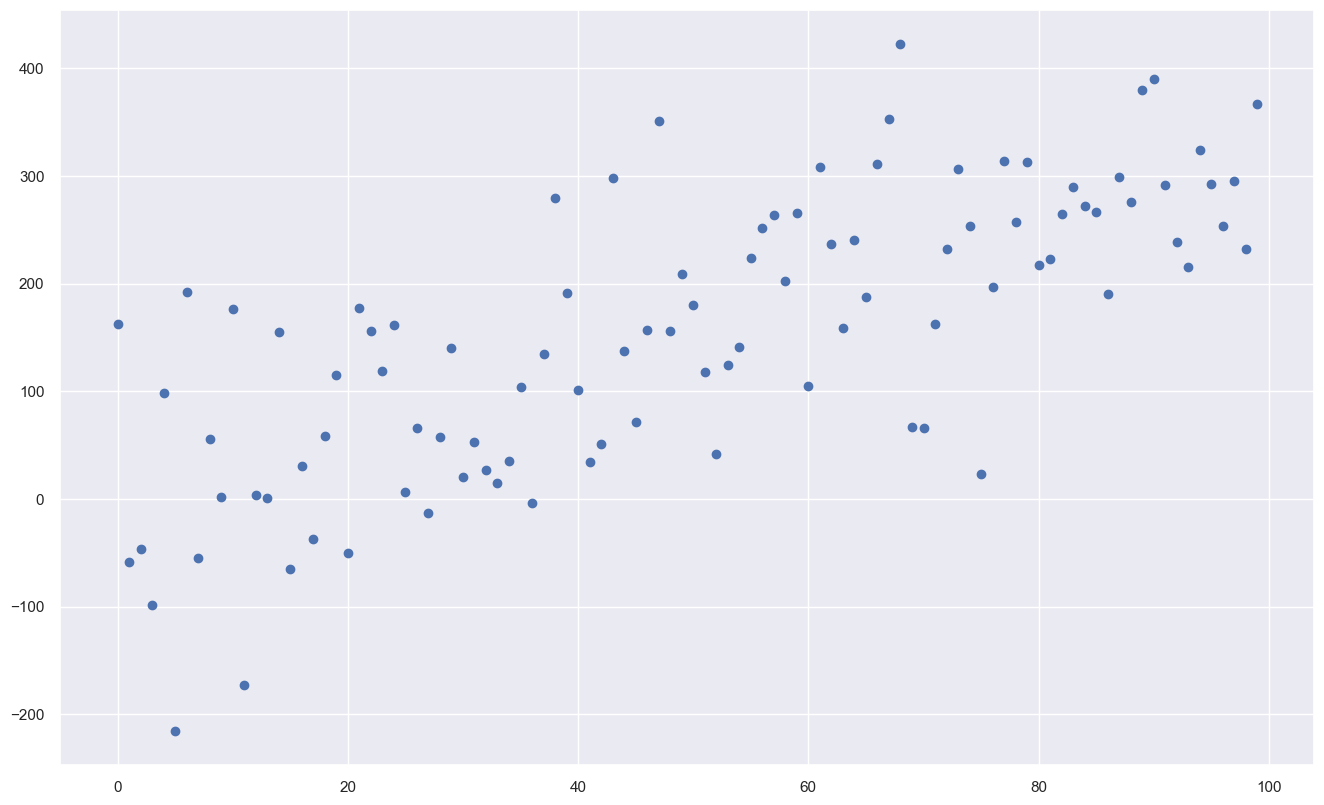

In [241]:
rng = np.random.RandomState(1)
# X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
# plt.axis('equal');

In [242]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [243]:
pca.components_.shape

(10, 100)

In [244]:
pca.components_[0][1] / pca.components_[0][0]

5.987935679160675

In [245]:
c = pca.components_
np.sum(c**2, axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [246]:
v[:2]

array([-165.60039978,   10.86360955])

In [247]:
pca.explained_variance_[:2]

array([17645.5404142 ,   373.08740214])

In [248]:
sigma = np.diag(pca.singular_values_)
w = pca.components_

In [249]:
w.shape

(10, 100)

In [250]:
t_bar = np.mean(X, axis=0)
s = np.dot((X - t_bar).T, X - t_bar)
s2 = np.dot(np.dot(w.T, np.dot(sigma.T, sigma)), w)

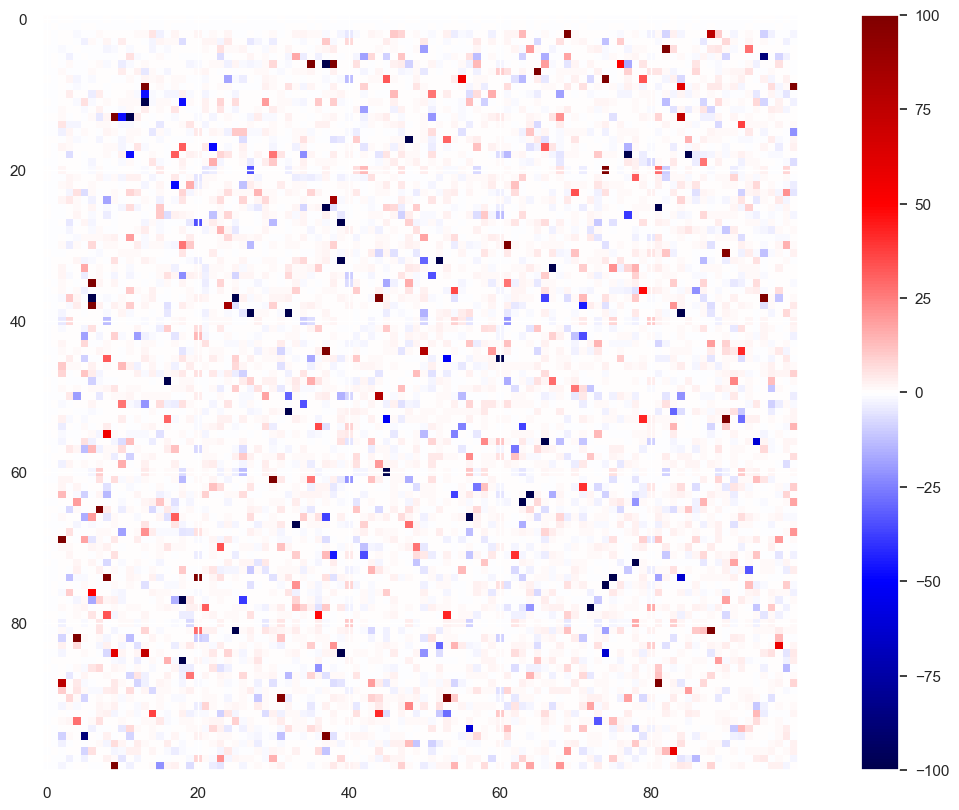

In [251]:
plt.imshow((s -s2)/s, cmap="seismic", vmin=-100, vmax=100)
plt.colorbar()
# plt.clim(-1,1)

[-165.60039978   10.86360955]
[ -16.83221609 -256.54368585]


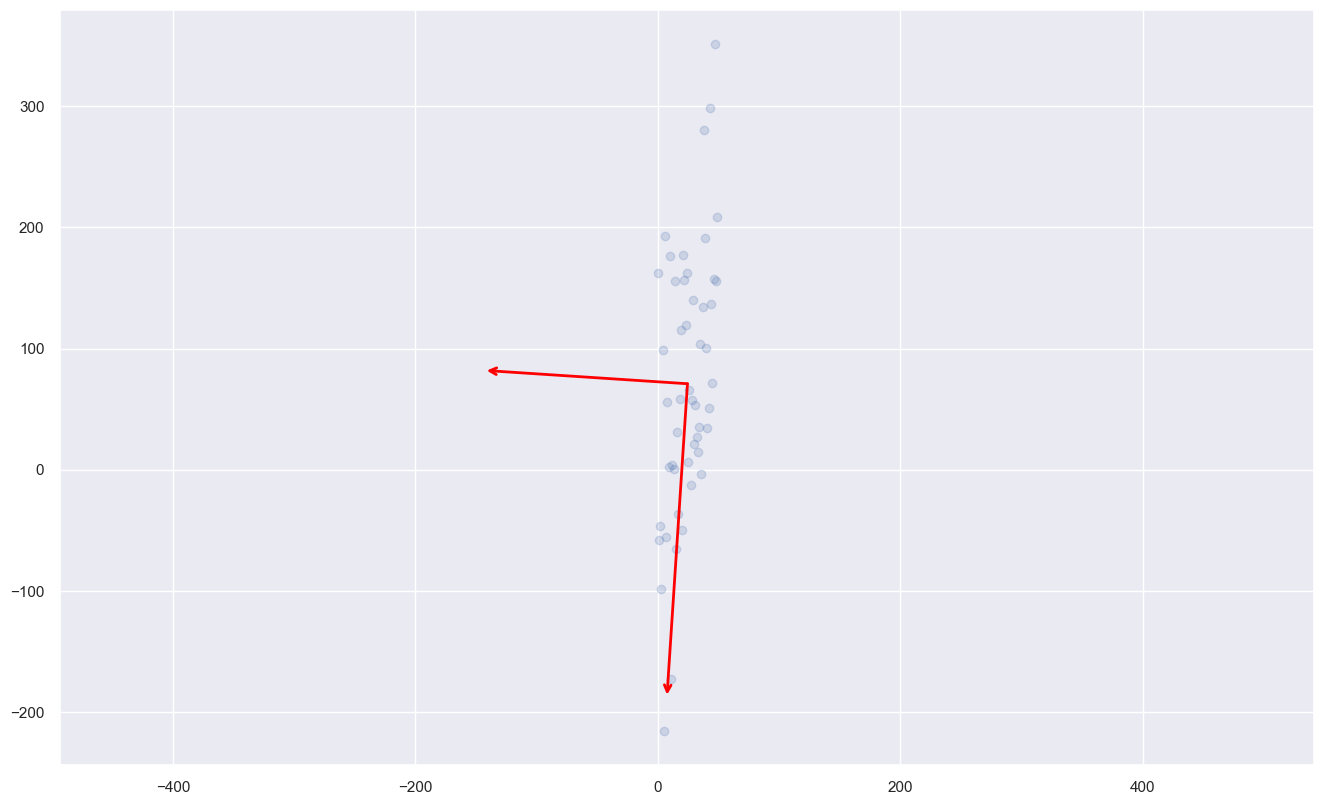

In [161]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0, color="red")
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
i = 0
for length, vector in zip(pca.explained_variance_, pca.components_):
    if i == 2:
        break
    i += 1
    print(v[:2])
    v = vector * 100 * np.sqrt(length)**0.2
    draw_vector(pca.mean_[:2], pca.mean_[:2] + v[:2])
plt.axis('equal');

In [162]:
X_pca.shape

(50, 1)

In [163]:
X.shape

(50, 100)

In [171]:
covar = pca.get_covariance()

In [172]:
covar.shape

(100, 100)

In [252]:
# pca = PCA(n_components=10)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [234]:
pca.get_params()

{'copy': True,
 'iterated_power': 'auto',
 'n_components': 100,
 'random_state': None,
 'svd_solver': 'auto',
 'tol': 0.0,
 'whiten': False}

In [256]:
pca.components_[0]

array([-1.64720829e-01, -9.86337729e-01,  3.48178638e-04, -3.69348263e-04,
       -1.06494880e-04, -4.85094289e-04,  1.41595560e-04, -5.02084185e-04,
        1.72806352e-04,  9.43692032e-06,  1.00775814e-04, -1.57348864e-04,
        2.68276757e-04, -1.28491175e-04,  1.95414908e-04,  1.97567724e-04,
        2.63471507e-05, -4.95705554e-04,  3.06208770e-04, -4.25114312e-04,
       -1.53226693e-04, -1.59741651e-04,  4.11103765e-05, -3.28696807e-04,
        2.44202352e-04, -2.45748542e-04, -2.27596424e-04, -1.36770215e-04,
       -3.87252269e-04,  7.80923409e-04, -3.45739633e-04, -1.09830079e-04,
        6.67593315e-05, -2.08089071e-04, -1.02022192e-04,  1.30783645e-04,
       -2.45968637e-05,  5.87844908e-05, -1.47070227e-04,  2.51628853e-04,
       -1.62221486e-04,  5.49956842e-05,  6.07470993e-05, -1.63359346e-04,
       -1.38537097e-04, -1.35787939e-04, -2.50003020e-04, -1.21877091e-04,
        5.03649430e-05,  9.51902496e-05,  3.38610517e-04,  7.10534866e-05,
        3.60022391e-04,  

In [258]:
np.dot(X, pca.components_[0])

array([-160.21557898,   57.21627066,   45.8487483 ,   96.46074865,
        -97.85462888,  211.39081621, -190.84197291,   53.21585616,
        -56.45921331,   -3.51714387, -175.4510718 ,  168.83918425,
         -5.68530748,   -2.72801599, -155.56341167,   61.63068214,
        -32.97324361,   33.4824821 ,  -60.39088248, -116.83715805,
         46.08391647, -178.50786919, -157.6499475 , -121.41041318,
       -163.82465769,  -10.65508118,  -69.09635434,    7.95763209,
        -61.04261005, -142.9002838 ,  -25.49106414,  -57.70318567,
        -32.1810852 ,  -19.71724082,  -40.00081583, -108.0824221 ,
         -2.25012989, -138.70179865, -282.4152322 , -195.0190055 ,
       -106.02852452,  -40.52349084,  -57.50260816, -301.25480213,
       -142.45722813,  -77.74047944, -162.52400088, -353.97295457,
       -161.79069554, -213.94059537, -185.79536004, -124.5670786 ,
        -49.74451455, -131.10176375, -148.07875071, -229.6666432 ,
       -257.68236078, -269.89344965, -209.34671044, -271.60580

In [263]:
pca.transform(X)[:, 0]

array([   0.38586863,  217.81771827,  206.4501959 ,  257.06219626,
         62.74681873,  371.99226382,  -30.2405253 ,  213.81730377,
        104.14223429,  157.08430373,  -14.84962419,  329.44063185,
        154.91614013,  157.87343162,    5.03803594,  222.23212974,
        127.62820399,  194.08392971,  100.21056513,   43.76428956,
        206.68536407,  -17.90642159,    2.95150011,   39.19103443,
         -3.22321009,  149.94636642,   91.50509327,  168.55907969,
         99.55883756,   17.7011638 ,  135.11038346,  102.89826194,
        128.4203624 ,  140.88420679,  120.60063178,   52.51902551,
        158.35131771,   21.89964896, -121.8137846 ,  -34.41755789,
         54.57292308,  120.07795676,  103.09883945, -140.65335452,
         18.14421947,   82.86096817,   -1.92255327, -193.37150696,
         -1.18924794,  -53.33914776,  -25.19391244,   36.03436901,
        110.85693305,   29.49968386,   12.5226969 ,  -69.06519559,
        -97.08091317, -109.29200204,  -48.74526283, -111.00435

In [166]:
np.dot((X - np.mean(X, axis=0)).T, X - np.mean(X, axis=0))

array([[ 1.04125000e+04,  3.98804586e+04, -1.99845279e+01, ...,
        -2.97370182e+01, -1.78201417e+01, -2.93520991e+01],
       [ 3.98804586e+04,  6.15621940e+05,  8.67962702e+01, ...,
        -1.38710074e+02, -3.70631155e+02, -8.51098348e+01],
       [-1.99845279e+01,  8.67962702e+01,  3.41343838e+00, ...,
        -6.40979675e-01, -3.70149073e-01,  4.57923939e-01],
       ...,
       [-2.97370182e+01, -1.38710074e+02, -6.40979675e-01, ...,
         3.94244159e+00, -2.06515946e-01, -3.37387522e-01],
       [-1.78201417e+01, -3.70631155e+02, -3.70149073e-01, ...,
        -2.06515946e-01,  3.81877986e+00,  9.57925259e-01],
       [-2.93520991e+01, -8.51098348e+01,  4.57923939e-01, ...,
        -3.37387522e-01,  9.57925259e-01,  4.38127973e+00]])

In [181]:
np.dot(X[0], pca.components_.T)

array([-1.62089274e+02,  1.06720951e+01,  3.77272394e-01,  6.10075707e-01,
       -2.64960526e-01,  1.60522973e+00,  5.88166101e-01, -8.22694257e-01,
        7.20143613e-02,  2.00767830e-01])

In [176]:
X[0].shape

(100,)

In [174]:
pca.components_[0].shape

(100,)

In [120]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (50, 100)
transformed shape: (50, 1)


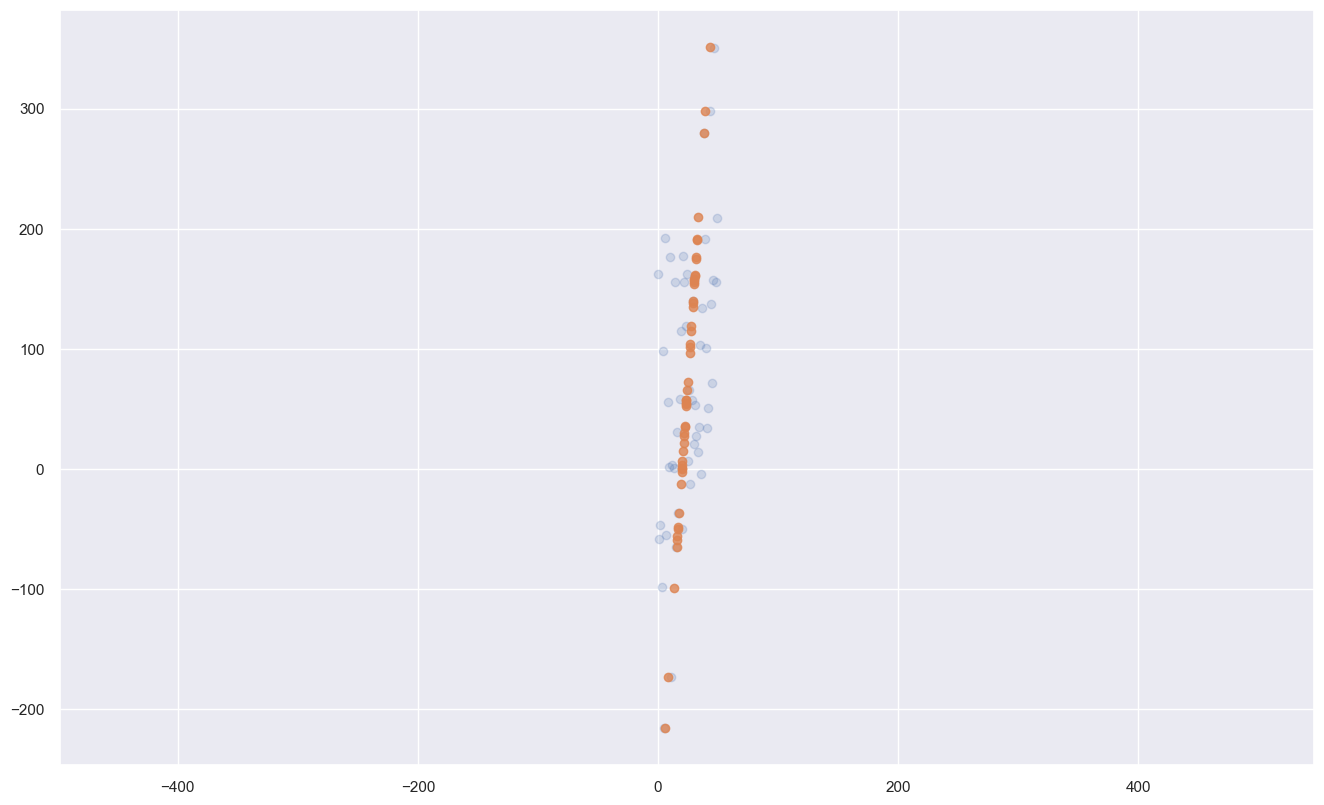

In [121]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

In [299]:
X = np.array([[1,2], [3,1], [4,6], [5,3]])
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

In [307]:
X_center = X - np.mean(X, axis=0)

In [308]:
X_center

array([[-2.25, -1.  ],
       [-0.25, -2.  ],
       [ 0.75,  3.  ],
       [ 1.75,  0.  ]])

In [312]:
n, m = X_center.shape
C = np.dot(X_center.T, X_center) / (n-1)

In [316]:
eigen_vals

array([1.90927383, 5.6740595 ])

In [313]:
eigen_vals, eigen_vecs = np.linalg.eig(C)

In [314]:
np.dot(X_center, eigen_vecs)

array([[ 1.40829634,  2.0197033 ],
       [-0.8206152 ,  1.84094831],
       [ 0.9099927 , -2.95540408],
       [-1.49767383, -0.90524753]])

In [304]:
X

array([[1, 2],
       [3, 1],
       [4, 6],
       [5, 3]])

In [300]:
pca.inverse_transform(X_pca)

array([[1., 2.],
       [3., 1.],
       [4., 6.],
       [5., 3.]])

In [303]:
X_pca

array([[-2.0197033 , -1.40829634],
       [-1.84094831,  0.8206152 ],
       [ 2.95540408, -0.9099927 ],
       [ 0.90524753,  1.49767383]])

In [319]:
np.dot(X_center, pca.components_)

array([[-2.0197033 , -1.40829634],
       [-1.84094831,  0.8206152 ],
       [ 2.95540408, -0.9099927 ],
       [ 0.90524753,  1.49767383]])

In [295]:
X

array([[1, 2],
       [3, 1],
       [4, 6],
       [5, 3]])

In [296]:
X_pca

array([[-2.0197033 ],
       [-1.84094831],
       [ 2.95540408],
       [ 0.90524753]])

In [276]:
pca.components_

array([[ 0.5172843 ,  0.85581362],
       [ 0.85581362, -0.5172843 ]])

array([[-2.0197033 , -1.40829634],
       [-1.84094831,  0.8206152 ],
       [ 2.95540408, -0.9099927 ],
       [ 0.90524753,  1.49767383]])

In [285]:
X

array([[1, 2],
       [3, 1],
       [4, 6],
       [5, 3]])

In [281]:
a

array([[ 2.22891154, -0.17875499],
       [ 2.40766653,  2.05015655],
       [ 7.20401892,  0.31954865],
       [ 5.15386237,  2.72721518]])

In [278]:
X

array([[1, 2],
       [3, 1],
       [4, 6],
       [5, 3]])

array([[1., 2.],
       [3., 1.],
       [4., 6.],
       [5., 3.]])

In [284]:
X_pca

array([[-2.0197033 , -1.40829634],
       [-1.84094831,  0.8206152 ],
       [ 2.95540408, -0.9099927 ],
       [ 0.90524753,  1.49767383]])